In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3ByYXR5dXNoc2luaGEvRG9jdW1lbnRzL3ByYXR5dXNoLW1sLmdpdGh1Yi5pby9wb3N0cw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/importlib/_bootstrap.py": 1763580027.0741518, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/importlib/_bootstrap_external.py": 1763580027.0744727, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/codecs.py": 1763580026.4790356, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/encodings/aliases.py": 1763580026.5033422, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/encodings/__init__.py": 1763580026.5027256, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/encodings/utf_8.py": 1763580026.5148034, "/Users/pratyushsinha/.local/share/uv/python/cpython-3.10.18-macos-aarch64-none/lib/python3.10/abc.py": 1763580026.4674213, "/Users/pratyushsinha/.local/share/uv/python

In [2]:
import torch
from gpt import GPTModel

GPT_CONFIG_124M = {
    "vocab_size":50257,
    "context_length":256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [3]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

file_path = "the-verdict.txt"
with open(file_path,"r",encoding="utf-8") as file:
    text_data = file.read()

total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Character length: ", total_characters) 
print("Tokens:", total_tokens)

Character length:  20479
Tokens: 5145


In [4]:
train_ratio = 0.9

split_idx = int(train_ratio * total_characters) # 0.9 * 20479 = 18431
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [5]:
import tiktoken
# This is the GPTDatasetV1 class
import torch
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        """
        txt: Input dataset
        tokenizer: Tokenizer for encoding text to numbers
        max_length: Maximum length of tokens to be in a batch
        stride: When we move from one batch to another, this defines the jump between two successive tokens

        """

        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt) # We encode text with the tokenizer

        for i in range(0, len(token_ids) - max_length, stride): # Max length is the length of each batch aka tokens in each batch
            input_chunk = token_ids[i: i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1] # This is the target chunk or the y variable
            # Another thing to note here is that both target and input are of the same length. This is different from forecasting problems

            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, index):
        return self.input_ids[index], self.target_ids[index]



def create_dataloader_v1(txt, batch_size = 4, max_length = 256,
                         stride = 128, shuffle=True, drop_last = True,
                         num_workers = 0):

    """
    batch_size: The number of independent sequences (samples) processed simultaneously in a single training step.
    max_length: The fixed number of tokens contained within each individual input sequence (also known as the context window).
    shuffle: Randomizes the order of the prepared chunks at the start of every epoch to prevent the model from learning the document's sequence.
    drop_last: Discards the final batch if it contains fewer samples than the specified batch_size, ensuring consistent tensor shapes for the GPU.
    num_workers: The number of additional CPU subprocesses used to parallelize the data loading and preprocessing to keep the GPU fed.
    """
    tokenizer = tiktoken.get_encoding("gpt2")

    dataset = GPTDatasetV1(txt, tokenizer,max_length,stride)

    dataloader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            drop_last=drop_last,
                            num_workers=num_workers)
    
    return dataloader

In [6]:
train_loader = create_dataloader_v1(
    train_data,
    batch_size = 2,
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    drop_last = True,
    shuffle = True,
    num_workers = 0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size = 2, # In practice, batch sizes, could go up to 1024.
    max_length = GPT_CONFIG_124M["context_length"],
    stride = GPT_CONFIG_124M["context_length"],
    drop_last = True,
    shuffle = True,
    num_workers = 0
)

print("Train Loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("Validation Loader")
for x, y in val_loader:
    print(x.shape, y.shape)

Train Loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
Validation Loader
torch.Size([2, 256]) torch.Size([2, 256])


In [7]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    logits = model(input_batch) # The output is logits here. 
    # logits.flatten(0,1) means that we flatten [batch,sequence_length,tokenizer_vocab_size] to [(batch * sequence_length),tokenizer_vocab_size]
    # target_batch.flatten flattens [batch, sequence_length] to [batch * sequence_length]
    loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
    
    return loss

In [8]:
def calc_loss_loader(data_loader, model, device, num_batches = None):
    total_loss = 0
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader)) # this reduces the number of batches to the total number of batches in the data loader
    for i, (input_batch,target_batch) in enumerate(data_loader):
        if i<num_batches:
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            total_loss += loss.item() # Summing the loss for each batch
        else:
            break
    return total_loss/num_batches # Average loss over all batches

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader,model,device)
    val_loss = calc_loss_loader(train_loader, model, device)

print("Training loss", train_loss)
print("Validation loss", val_loss)

Training loss 10.987583690219456
Validation loss 10.987583584255642


In [10]:
def train_model_simple(model, train_loader, val_loader, optimizer,device, num_epochs, eval_freq, eval_iter, start_context, tokenizer):
    # Initialize training, validation losses. Also tracking the total tokens seen as a result of this
    train_losses, val_losses, track_tokens_seen = [], [], []

    tokens_seen,global_step = 0, -1
    
    for epoch in range(num_epochs): # Epoch training loop
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # We reset the loss gradients from the previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch,model, device)
            loss.backward() # We calculat the loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch +1} (Step {global_step:06d}):"
                f"Train loss {train_loss:.3f},"
                f"Val loss {val_loss:.3f}")

        generate_and_print_sample(model,tokenizer,  device, start_context) # Prints sample text after each epoch. Great for sense checks.
    return train_losses, val_losses, track_tokens_seen

In [11]:
def evaluate_model(model, train_loader, val_loader,device, eval_iter):
    model.eval()
    with torch.no_grad(): # This tells the model to stop calculating gradients.
        train_loss = calc_loss_loader(
            train_loader,model, device, num_batches = eval_iter
        )
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [12]:
from gpt import generate_text_simple


def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special = {'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0)
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0)
    return tokenizer.decode(flat.tolist())


def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(model=model, idx=encoded, max_new_tokens=50, context_size = context_size)

    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n","")) # We do this to generate more compact text.
    model.train()

In [13]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr = 0.0004,
    weight_decay = 0.1
)
num_epochs = 20
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader,val_loader,optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter = 5,
    start_context="Every effort moves you", tokenizer = tokenizer
)

Ep 1 (Step 000000):Train loss 9.781,Val loss 9.933


Ep 1 (Step 000005):Train loss 8.072,Val loss 8.341


Every effort moves you,,,,,,,,,,,,.


Ep 2 (Step 000010):Train loss 6.752,Val loss 7.044


Ep 2 (Step 000015):Train loss 6.094,Val loss 6.597


Every effort moves you, the,, the,, the,,,,.


Ep 3 (Step 000020):Train loss 6.197,Val loss 6.821


Ep 3 (Step 000025):Train loss 5.237,Val loss 6.372


Every effort moves you."I was the picture."I was the the picture."I the honour, and I had"I was.


Ep 4 (Step 000030):Train loss 4.857,Val loss 6.277


Ep 4 (Step 000035):Train loss 4.207,Val loss 6.262


Every effort moves you, and I had been the picture of the picture.


Ep 5 (Step 000040):Train loss 4.078,Val loss 6.243


Every effort moves you know it was not to the picture--I to the


Ep 6 (Step 000045):Train loss 3.225,Val loss 6.132


Ep 6 (Step 000050):Train loss 2.393,Val loss 6.151


Every effort moves you know," was not that I felt as it--I had a good-rooms, and he was, and in fact, and I had been the moment--as Jack himself, as his own painting, of Jack's "strong. Gisburn


Ep 7 (Step 000055):Train loss 2.074,Val loss 6.237


Ep 7 (Step 000060):Train loss 1.679,Val loss 6.239


Every effort moves you?"" on a little Mrs."--as such--had not till his--and that one of Jack's degree to the donkey."I-c."I looked up his pictures--because he had been his


Ep 8 (Step 000065):Train loss 1.281,Val loss 6.287


Ep 8 (Step 000070):Train loss 0.988,Val loss 6.333


Every effort moves you?""Yes--quite insensible to the fact with a laugh: "Yes--and by me!"He laughed again, and threw back his glory, and as once one had I turned, and down the room, when I


Ep 9 (Step 000075):Train loss 0.646,Val loss 6.379


Ep 9 (Step 000080):Train loss 0.412,Val loss 6.438


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 10 (Step 000085):Train loss 0.332,Val loss 6.514


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back the window-curtains, moved aside a _jardiniere_ full of


Ep 11 (Step 000090):Train loss 0.232,Val loss 6.596


Ep 11 (Step 000095):Train loss 0.198,Val loss 6.677


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 12 (Step 000100):Train loss 0.157,Val loss 6.720


Ep 12 (Step 000105):Train loss 0.131,Val loss 6.754


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 13 (Step 000110):Train loss 0.108,Val loss 6.812


Ep 13 (Step 000115):Train loss 0.086,Val loss 6.875


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back the window-curtains, moved aside a _jardiniere_ full of


Ep 14 (Step 000120):Train loss 0.069,Val loss 6.867


Ep 14 (Step 000125):Train loss 0.081,Val loss 6.903


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 15 (Step 000130):Train loss 0.078,Val loss 7.066


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 16 (Step 000135):Train loss 0.061,Val loss 7.005


Ep 16 (Step 000140):Train loss 0.049,Val loss 6.966


Every effort moves you?"I glanced after him, struck by his last word. Victor Grindle was, in fact, becoming the man of the moment--as Jack himself, one might put it, had been the man of the hour. The


Ep 17 (Step 000145):Train loss 0.074,Val loss 7.117


Ep 17 (Step 000150):Train loss 0.042,Val loss 6.979


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 18 (Step 000155):Train loss 0.038,Val loss 7.082


Ep 18 (Step 000160):Train loss 0.026,Val loss 7.170


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 19 (Step 000165):Train loss 0.020,Val loss 7.069


Ep 19 (Step 000170):Train loss 0.019,Val loss 7.124


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


Ep 20 (Step 000175):Train loss 0.013,Val loss 7.140


Every effort moves you?""Yes--quite insensible to the irony. She wanted him vindicated--and by me!"He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I


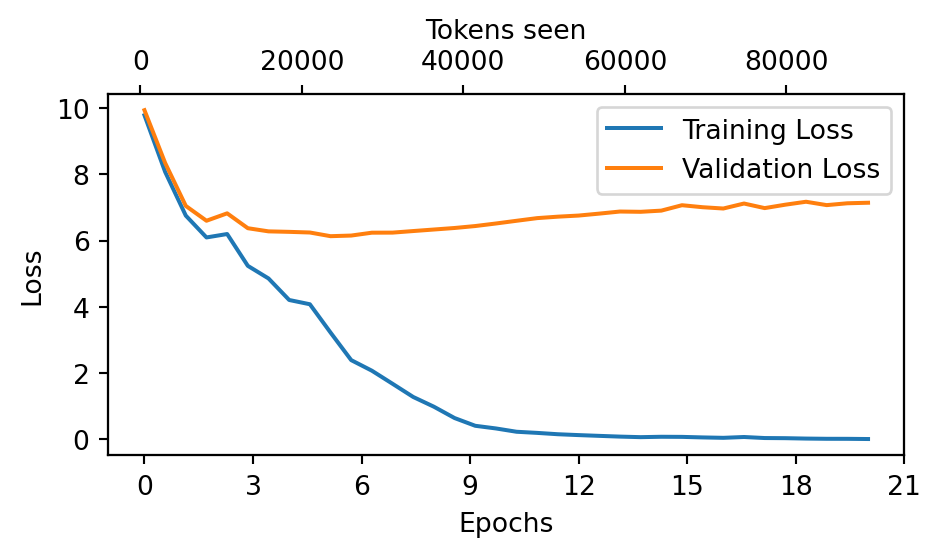

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5,3))
    ax1.plot(epochs_seen, train_losses, label="Training Loss")
    ax1.plot(epochs_seen, val_losses,linestyle="-",label="Validation Loss")

    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()

epochs_tensor = torch.linspace(0,num_epochs,len(train_losses))
plot_losses(epochs_tensor,tokens_seen, train_losses, val_losses)

In [15]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8
    } 

inverse_vocab = {v: k for k, v in vocab.items()}

next_token_logits = torch.tensor([4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79])

probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id])

forward


In [16]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

forward


In [17]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sample_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sample_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

73 x closer
0 x every
0 x effort
582 x forward
2 x inches
0 x moves
0 x pizza
343 x toward


In [18]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits/temperature
    return torch.softmax(scaled_logits, dim=0)

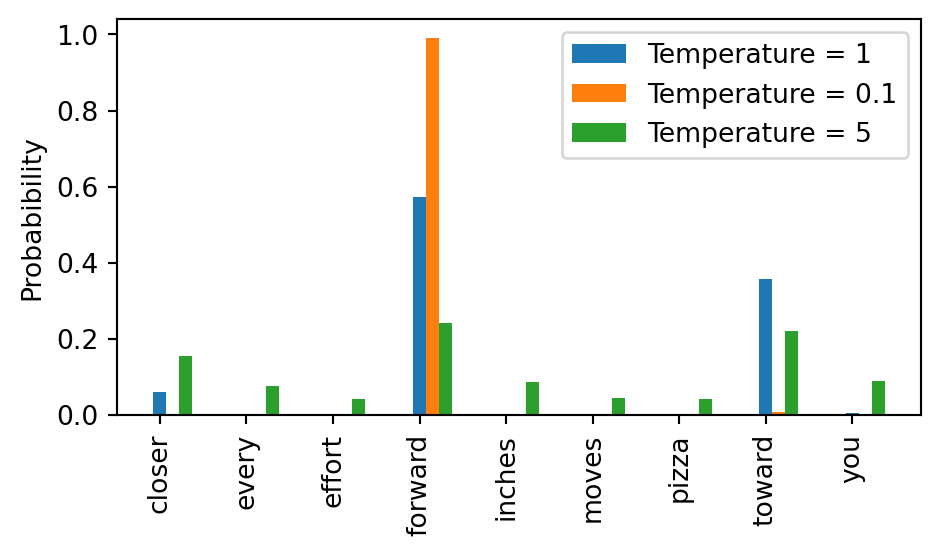

In [19]:
temperatures = [1,0.1,5]
scaled_probas = [softmax_with_temperature(next_token_logits,T) for T in temperatures]

x = torch.arange(len(vocab))

bar_width = 0.15

fix, ax = plt.subplots(figsize=(5,3))

for i,T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i],
    bar_width, label = f"Temperature = {T}")
ax.set_ylabel("Probabibility")
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(),rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [21]:
new_logits = torch.where(
    condition=next_token_logits < top_logits[-1], # identify the logits less than top 3
    input=torch.tensor(float('-inf')), # Replace those less than the criteria with -inf
    other=next_token_logits # Retains the original logits for all other tokens
)

print(new_logits)

topk_probas = torch.softmax(new_logits, dim=0)

print(topk_probas)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])
tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [22]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k = None, eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:,-context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:,-1,:]
        if top_k is not None:
            top_logits,_ = torch.topk(logits, top_k)
            min_val = top_logits[:,-1]
            logits = torch.where(
                logits < min_val,
                torch.tensor(float('-inf')).to(logits.device),
                logits
            )
        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim = -1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)
        if idx_next == eos_id:
            break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx


torch.manual_seed(123)
token_ids = generate(model=model,
idx=text_to_token_ids("Every effort moves you", tokenizer),
max_new_tokens=14,
context_size=GPT_CONFIG_124M["context_length"],
top_k=25,
temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves youlit terrace.

I glanced after him, one handsome "


In [23]:
torch.save(model.state_dict(),"model.pth")

model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth", map_location=device))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [24]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict()
},
"model_and_optimizer.pth"
)

checkpoint = torch.load("model_and_optimizer.pth", map_location=device)
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])

optimizer = torch.optim.AdamW(model.parameters(), lr = 5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

model.train()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features